In [30]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as st
import statsmodels.stats.stattools
import random
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller

#Note that not all figures below were used (in fact most weren't), and hence they are not prepared well with labels and readable axis.
#The code linearly follows the list of questions asked.

[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_705/788089461.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  mtch_df['Return'].iloc[i]=100*(mtch_df['Adj Close'].iloc[i] - mtch_df['Adj Close'].iloc[i-1

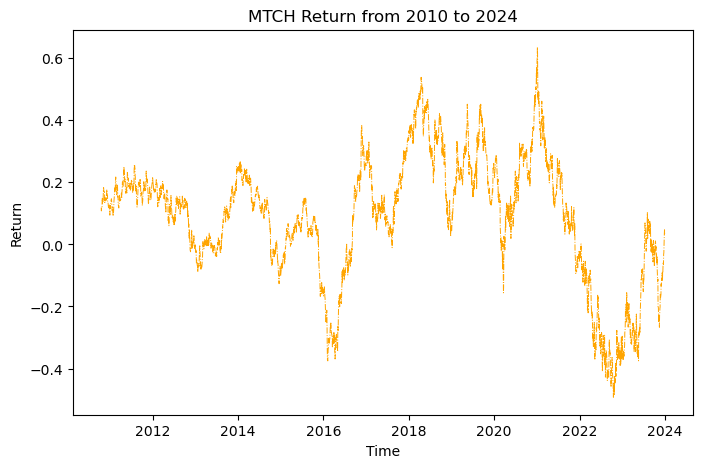

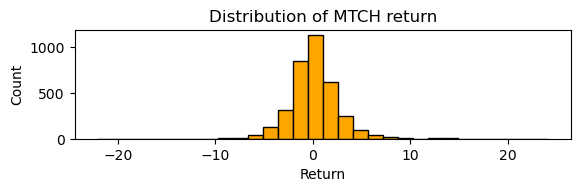

mean: 0.08702721418202213 
 median: 0.032302220023908174 
 std: 2.5951826744128335 
 max: 24.164513727541753 
 min: -22.092523180215103 
 skew: 0.21144203212012333 
 kurtosis: 8.903657886880962


In [51]:
#Step 1
mtch_df=yf.download('MTCH',start='2010-01-01',end='2024-01-01')
mtch_df.dropna(inplace=True)

mtch_df['Return']=0  
for i in range(0,len(mtch_df)):
    mtch_df['Return'].iloc[i]=100*(mtch_df['Adj Close'].iloc[i] - mtch_df['Adj Close'].iloc[i-1])/mtch_df['Adj Close'].iloc[i-1]
mtch_df=mtch_df.iloc[1:]

ym=mtch_df['Return'].rolling(window=200).mean()
labm=pd.date_range('2010-01-01', '2024-01-01',len(mtch_df))



ehrm_df=yf.download('PSM.DE',start='2010-01-01',end='2020-01-01')
ehrm_df.dropna(inplace=True)

ehrm_df['Return']=0
for i in range(0,len(ehrm_df)):
    ehrm_df['Return'].iloc[i]=100*(ehrm_df['Adj Close'].iloc[i] - ehrm_df['Adj Close'].iloc[i-1])/ehrm_df['Adj Close'].iloc[i-1]
ehrm_df=ehrm_df.iloc[1:]

yb=ehrm_df['Return'].rolling(window=200).mean()
labb=pd.date_range('2010-01-01', '2020-01-01',len(ehrm_df))


# def prep_ticker(tickers):
#     for ticker in tickers:
#         ticker_df=yf.download(ticker,start='2010-01-01',end='2024-01-01')
#         ticker_df.dropna(inplace=True)

#         ticker_df['Return']=0
        
#         for i in range(0,len(ticker_df)):
#             ticker_df['Return'].iloc[i]=100*(ticker_df['Adj Close'].iloc[i] - ticker_df['Adj Close'].iloc[i-1])/ticker_df['Adj Close'].iloc[i-1]

#         ticker_df=ticker_df.iloc[1:]
#         yt=ticker_df['Return'].rolling(window=200).mean()
#         labs=pd.date_range('2010-01-01', '2020-01-01',len(ticker_df))
    
#         plt.plot(labs,yt,linestyle='dashdot',lw=0.7,label=ticker)

#     plt.legend(loc='best')
#     plt.figure(figsize=(8,5))
#     plt.show()
    
    
#Step 2 1)
plt.figure(figsize=(8,5))
plt.plot(labm,ym,linestyle='dashdot',color='orange',lw=0.7,label='MTCH')
plt.xlabel('Time')
plt.ylabel('Return')
plt.title('MTCH Return from 2010 to 2024')
#plot eHarmony as well
plt.show()

#Histograms
fig=plt.figure()
ax=fig.add_subplot(311)
plt.hist(mtch_df['Return'], bins=30, color='orange', edgecolor='black')
plt.xlabel('Return')
plt.ylabel('Count')
plt.title('Distribution of MTCH return')
#bx=fig.add_subplot(312)
#plt.hist(ehrm_df['Return'], bins=30, color='green', edgecolor='black')
plt.show()

#summary statistics
print(
'mean:',mtch_df['Return'].mean(),'\n',
'median:',mtch_df['Return'].median(),'\n',
'std:',mtch_df['Return'].std(),'\n',
'max:',mtch_df['Return'].max(),'\n',
'min:',mtch_df['Return'].min(),'\n',
'skew:',mtch_df['Return'].skew(),'\n',
'kurtosis:',kurtosis(mtch_df['Return']))


In [4]:
#Step 2 2)
mtch_df.reset_index(inplace=True)
lagged_returns_mtch_df=mtch_df['Return'].shift(1)[1:]
w=sm.add_constant(lagged_returns_mtch_df)
result=sm.OLS(mtch_df['Return'][1:], w).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.009
Date:                Fri, 05 Jul 2024   Prob (F-statistic):              0.315
Time:                        08:40:04   Log-Likelihood:                -5630.1
No. Observations:                2514   AIC:                         1.126e+04
Df Residuals:                    2512   BIC:                         1.128e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1294      0.045      2.849      0.004       0.040       0.218
Return         0.0200      0.020      1.005      0.315      -0.019       0.059
==============================================================================
Omnibus:                      568.016   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24368.030
Skew:                           0.158   Prob(JB):                         0.00
Kurtosis:                      18.249   Cond. No.                         2.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
residuals_bp=result.resid
print("Mean:",np.mean(residuals_bp),
      "Median:",np.median(residuals_bp),
      "Variance:",np.var(residuals_bp))

def assess_normality(sg,residuals):
    stat=st.anderson(residuals,dist='norm').statistic
    
    i=st.anderson(residuals).significance_level.tolist().index(sg*100)
    threshold=st.anderson(residuals).critical_values[i]
    
    print('Critical val:',stat)
    
    if stat > threshold:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')

assess_normality(0.15,result.resid)


Mean: 1.1022739337567186e-16 Median: -0.06752381346990717 Variance: 5.160748930854587
Critical val: 35.90799860936522
Residuals are not normally distributed


/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


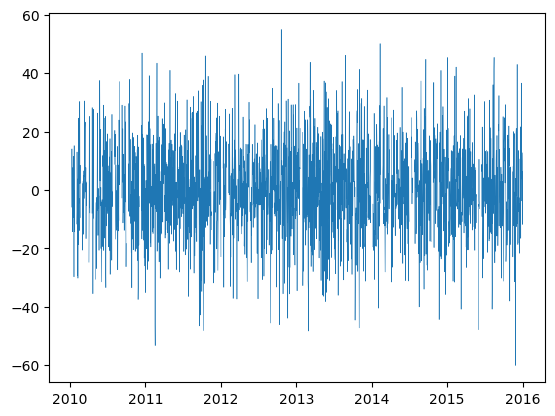

Return P-value: 0.4380584728264942
Close P-value: 0.00012174490362763048
Without constant:                                  OLS Regression Results                                
Dep. Variable:                 Return   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.373
Date:                Fri, 05 Jul 2024   Prob (F-statistic):                       0.241
Time:                        08:40:06   Log-Likelihood:                         -5634.1
No. Observations:                2514   AIC:                                  1.127e+04
Df Residuals:                    2513   BIC:                                  1.128e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std 

In [6]:
#Step 2 3)
mtch_df['Log Ret']=100*(np.log(np.abs(mtch_df['Return'][1:]/lagged_returns_mtch_df)))

plt.plot(pd.date_range('2010-01-01', '2016-01-01',len(mtch_df)),
                      (mtch_df['Log Ret'].rolling(window=10).mean()), linewidth=0.4)
plt.show()

#Determining autocorrelation in returns

#Null: No autocorrelation
#Alternative: There is autocorrelation
#Breusch-Godfrey Test test for independence
#significance level: 0.05
bg_mtch_df_resids=sm.stats.diagnostic.acorr_breusch_godfrey(result)
print('Return P-value:',bg_mtch_df_resids[1])

#(6)
#For Close price now
lagged_close_mtch_df=mtch_df['Close'].shift(1)
k=sm.add_constant(lagged_close_mtch_df[1:])
fit=sm.OLS(mtch_df['Close'][1:], k).fit()

bg_close_resids=sm.stats.diagnostic.acorr_breusch_godfrey(fit)
print('Close P-value:',bg_close_resids[1])

#P-value decreased drastically, in case with Return price, P-val>>0.05, in case with close price, P-val<<0.05

#(7)
#Evaluate Autoregressive 1 Model w/ and w/o constant term
fit_without_constant=sm.OLS(mtch_df['Return'][1:],lagged_returns_mtch_df).fit()
fit_with_constant=result
print('Without constant:',fit_without_constant.summary(),'With constant:',fit_with_constant.summary())

#F-stat, associated P-value, and coeffs are very low in both cases. Neither model
#is a good fit. It tells us that the random walk model is weak.

In [7]:
#(8)
#Null hypothesis: beta=0
#Alternative hypothesis: beta!=0
#Under the null, we have that R_t = sigma + epsilon_t
#To find sigma, we can average simply average the returns
avg_return=sum(mtch_df['Return'])/len(mtch_df['Return'])

#Find residuals
resids=mtch_df['Return'][1:]-avg_return

#Calculate test statistic
test_stat=statsmodels.stats.stattools.durbin_watson(resids)
print('Test statistic:',test_stat)

#This value is close to 2 => fail to reject the null

Test statistic: 1.9594353403955855


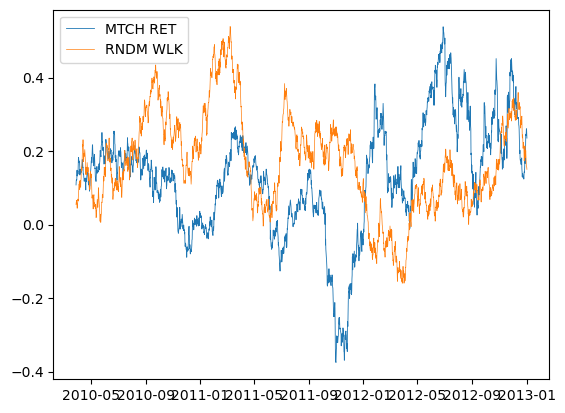

In [8]:
#(9)
#We can compare our time-series with a random walk.

random.seed(1)

#Simulate random walk
lower=mtch_df['Return'].quantile(0.05)
upper=mtch_df['Return'].quantile(0.95)

mtch_df['Random']=[random.uniform(lower,upper) for i in range(len(mtch_df))]


plt.plot(pd.date_range('2010-01-01', '2013-01-01',len(mtch_df[1:])), 
        mtch_df['Return'][1:].rolling(window=200).mean(),
        linewidth=0.6,
        label='MTCH RET')
plt.plot(pd.date_range('2010-01-01', '2013-01-01',len(mtch_df)),
        mtch_df['Random'].rolling(window=200).mean(),
        linewidth=0.5,
        label='RNDM WLK')
plt.legend(loc='best')
plt.show()
#Visually, we can see distinct similarities between the charts that affirm the stochasticity of BP return data.
#If time permits, one can also use an ADF test to determine the statistical cointegrated similarity.

In [9]:
#Detecting seasonality in Markets
match_df=yf.download('BP',start='2010-01-01',end='2020-01-01')
match_df['Return']=match_df['Adj Close'].pct_change()
match_df=match_df.iloc[3:]
match_df.reset_index(inplace=True)

#Check day of week of first entry
day_labels=[4,5,6,7,1,2,3]*359
new_column = pd.DataFrame({'Day': day_labels})
match_df=pd.concat([match_df, new_column], axis=1).dropna()

match_df['D1'] = np.where(match_df['Day'] == 1, 1, 0)
match_df['D2'] = np.where(match_df['Day'] == 2, 1, 0)
match_df['D3'] = np.where(match_df['Day'] == 3, 1, 0)
match_df['D4'] = np.where(match_df['Day'] == 4, 1, 0)
match_df['D5'] = np.where(match_df['Day'] == 5, 1, 0)

x=match_df[['D1','D2','D3','D4','D5']]
y=match_df['Return']

fit=sm.OLS(y,x).fit()

#Null hypothesis: Monday ret isn't statistically sig than other days (D1 coeff=0)
#Alternative: Monday is statistically sig (D1 coeff!=0)
#alpha level: 0.05
#View the result.summary() of result to find that D1 has coeff 0.0007, and P>|t| = 0.651 >> 0.05 = alpha
#Hence, we accept the null hypothesis and conclude that Monday is not statistically significant.

[*********************100%%**********************]  1 of 1 completed


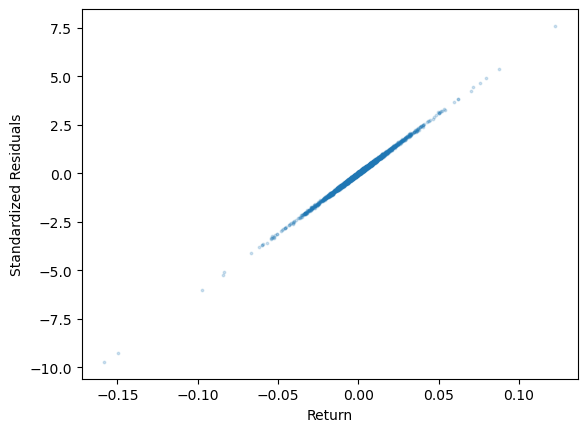

Covariance btwn resid and X: 0.0002611545180160033
Variance of resid: 0.0002611594696712153
Variance of X: 0.00026153199010185154
Mean of Resid: 0.00015484555600625213
Shapiro statistic: 0.9146906390662042 , Shapiro p-value: 1.834717943298403e-35
  Variable       VIF
0    const  3.500000
1       D1  1.285714
2       D2  1.285714
3       D3  1.285714
4       D4  1.285714
5       D5  1.285714


In [10]:
#This code is used to find heteroskedasticity of the model, part of the analysis
standard_resids=(fit.resid-fit.resid.mean())/fit.resid.std()
plt.scatter(match_df['Return'],standard_resids,alpha=0.2,s=3)
plt.xlabel("Return")
plt.ylabel("Standardized Residuals")
plt.show()
#No evidence of non-constant variance (indicated by the lack of the cone shape)

#Evaluate covariance
print('Covariance btwn resid and X:',np.cov(fit.resid,match_df['Return'])[0,1])
print('Variance of resid:',fit.resid.var())
print('Variance of X:',match_df['Return'].var())
print('Mean of Resid:',match_df['Return'].mean())
#Test for normality
#Use the Shapiro-Wilk test with alpha as 0.05, null hypothesis: data comes from normal distribution
print('Shapiro statistic:',shapiro(fit.resid)[0],
      ', Shapiro p-value:',shapiro(fit.resid)[1])

#Assess multicollinearity
#Create covariance matrix
cols=match_df[['D1','D2','D3','D4','D5']]
cov_matrix=cols.cov()
cov_matrix
#Observe that the entries for indices i!=j are close to 0, indicating no linear relationship between explanatory vars.

#Adding a constant column for intercept
cols_with_const = sm.add_constant(cols)

#Calculating VIF for each independent var
vif_data = pd.DataFrame()
vif_data["Variable"] = cols_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(cols_with_const.values, i) for i in range(cols_with_const.shape[1])]

print(vif_data)

#This code for calculating the vif was lifted from an online source. I do not claim credit.

In [11]:
#fit.summary()  Use this to read off F-stat, p-vals, DW stat, etc.

/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

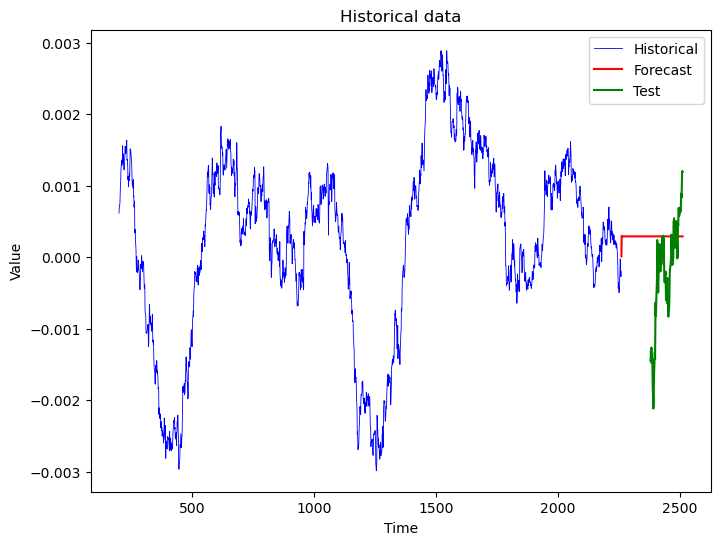

In [36]:
#Fit ARIMA model

train_mtch,test_mtch=train_test_split(match_df['Return'],test_size=0.1,random_state=55)

#construct fit with ARIMA
model=ARIMA(train_mtch,order=(1,1,1)).fit()

#construct forecast dataset
steps=len(test_mtch)
forecast=model.forecast(steps)

plt.figure(figsize=(8,6))
#plot training data
i=np.arange(0,len(train_mtch),1)
plt.plot(i,train_mtch.rolling(window=200).mean(),label='Historical',color='blue',linewidth=0.6)
#plot forecast data
p=np.arange(len(train_mtch),len(train_mtch)+steps,1)
plt.plot(p,forecast,label='Forecast',color='red')
#plot testing data
plt.plot(p,test_mtch.rolling(window=120).mean(),label='Test',color='green')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Historical data')
plt.legend(loc='best')

Text(0, 0.5, 'Residuals')

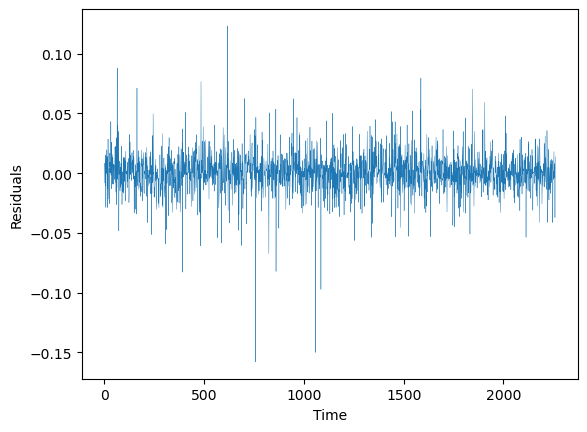

In [37]:
plt.plot(i,model.resid,linewidth=0.3)
plt.xlabel('Time')
plt.ylabel('Residuals')

Text(0, 0.5, 'Autocorr. function (ACF)')

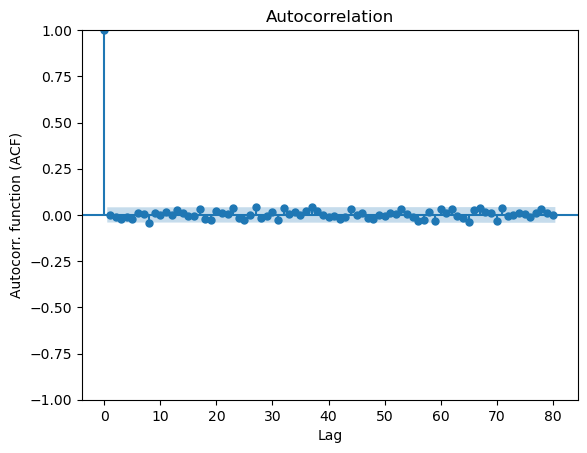

In [42]:
adf=adfuller(model.resid)
sm.graphics.tsa.plot_acf(model.resid,lags=80,ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorr. function (ACF)')